* Epoch 0 -- Error :   Train : 1.9252    Validation : 0.4007
* Epoch 10 -- Error :   Train : 0.0690    Validation : 0.0695
* Epoch 20 -- Error :   Train : 0.0459    Validation : 0.0466
* Epoch 30 -- Error :   Train : 0.0395    Validation : 0.0402
* Epoch 40 -- Error :   Train : 0.0359    Validation : 0.0368
* Epoch 50 -- Error :   Train : 0.0332    Validation : 0.0338
* Epoch 60 -- Error :   Train : 0.0309    Validation : 0.0319
* Epoch 70 -- Error :   Train : 0.0289    Validation : 0.0296
* Epoch 80 -- Error :   Train : 0.0273    Validation : 0.0279
* Epoch 90 -- Error :   Train : 0.0258    Validation : 0.0266
* Epoch 100 -- Error :   Train : 0.0246    Validation : 0.0252
* Epoch 110 -- Error :   Train : 0.0234    Validation : 0.0242
* Epoch 120 -- Error :   Train : 0.0225    Validation : 0.0234
* Epoch 130 -- Error :   Train : 0.0216    Validation : 0.0223
* Epoch 140 -- Error :   Train : 0.0208    Validation : 0.0214
* Epoch 150 -- Error :   Train : 0.0201    Validation : 0.0209
* E

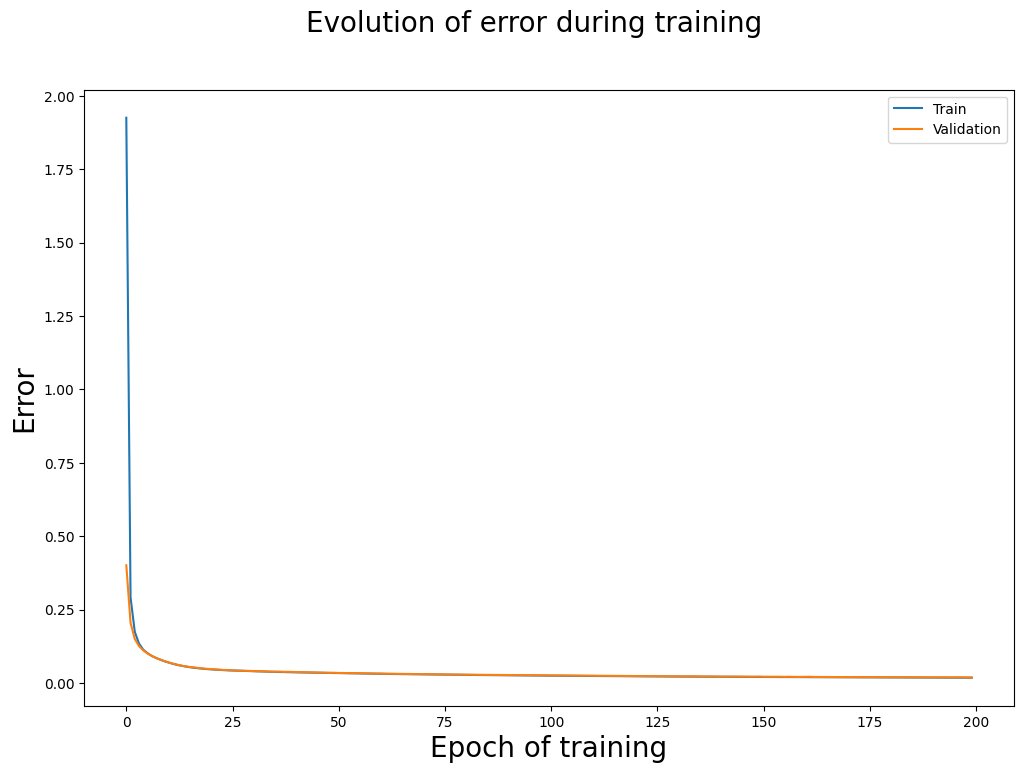

* Epoch 0 -- Error :   Train : 3.2039    Validation : 0.5128
* Epoch 10 -- Error :   Train : 0.0582    Validation : 0.0749
* Epoch 20 -- Error :   Train : 0.0397    Validation : 0.0473
* Epoch 30 -- Error :   Train : 0.0318    Validation : 0.0370
* Epoch 40 -- Error :   Train : 0.0266    Validation : 0.0302
* Epoch 50 -- Error :   Train : 0.0227    Validation : 0.0259
* Epoch 60 -- Error :   Train : 0.0202    Validation : 0.0227
* Epoch 70 -- Error :   Train : 0.0182    Validation : 0.0204
* Epoch 80 -- Error :   Train : 0.0167    Validation : 0.0188
* Epoch 90 -- Error :   Train : 0.0154    Validation : 0.0173
* Epoch 100 -- Error :   Train : 0.0142    Validation : 0.0160
* Epoch 110 -- Error :   Train : 0.0132    Validation : 0.0149
* Epoch 120 -- Error :   Train : 0.0123    Validation : 0.0139
* Epoch 130 -- Error :   Train : 0.0114    Validation : 0.0130
* Epoch 140 -- Error :   Train : 0.0107    Validation : 0.0122
* Epoch 150 -- Error :   Train : 0.0100    Validation : 0.0114
* E

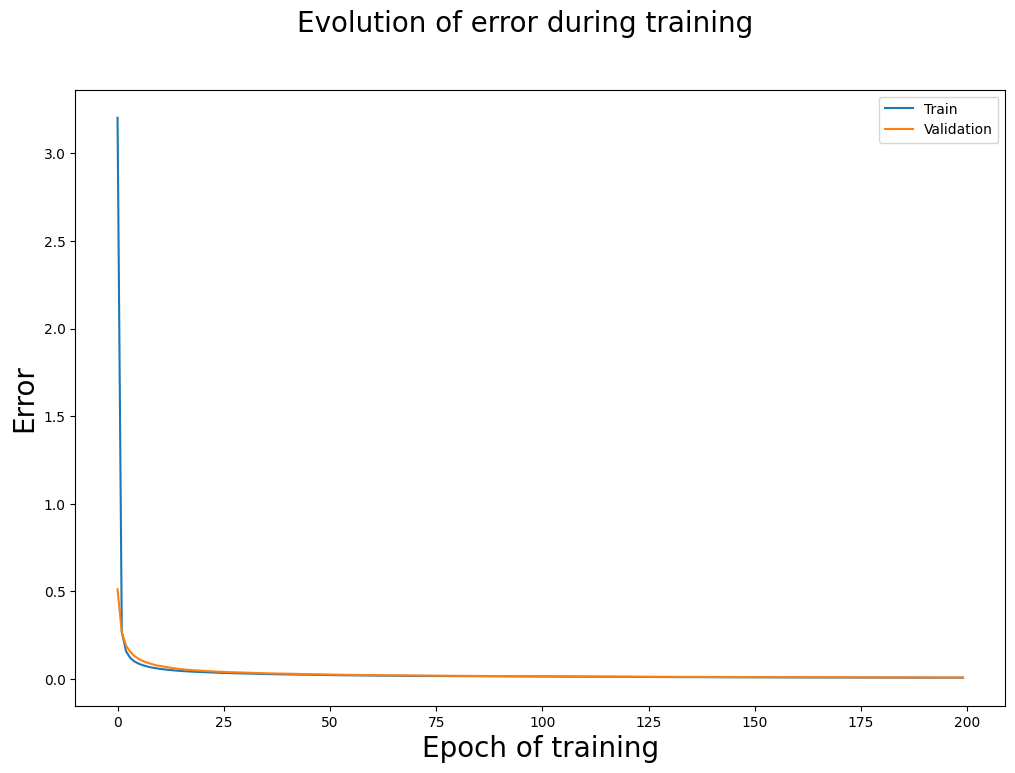

* Epoch 0 -- Error :   Train : 19.2168    Validation : 0.4789
* Epoch 10 -- Error :   Train : 0.0432    Validation : 0.0429
* Epoch 20 -- Error :   Train : 0.0232    Validation : 0.0242
* Epoch 30 -- Error :   Train : 0.0167    Validation : 0.0184
* Epoch 40 -- Error :   Train : 0.0135    Validation : 0.0154
* Epoch 50 -- Error :   Train : 0.0114    Validation : 0.0135
* Epoch 60 -- Error :   Train : 0.0100    Validation : 0.0121
* Epoch 70 -- Error :   Train : 0.0089    Validation : 0.0111
* Epoch 80 -- Error :   Train : 0.0081    Validation : 0.0102
* Epoch 90 -- Error :   Train : 0.0075    Validation : 0.0095
* Epoch 100 -- Error :   Train : 0.0070    Validation : 0.0089
* Epoch 110 -- Error :   Train : 0.0065    Validation : 0.0084
* Epoch 120 -- Error :   Train : 0.0062    Validation : 0.0080
* Epoch 130 -- Error :   Train : 0.0058    Validation : 0.0077
* Epoch 140 -- Error :   Train : 0.0055    Validation : 0.0073
* Epoch 150 -- Error :   Train : 0.0053    Validation : 0.0070
* 

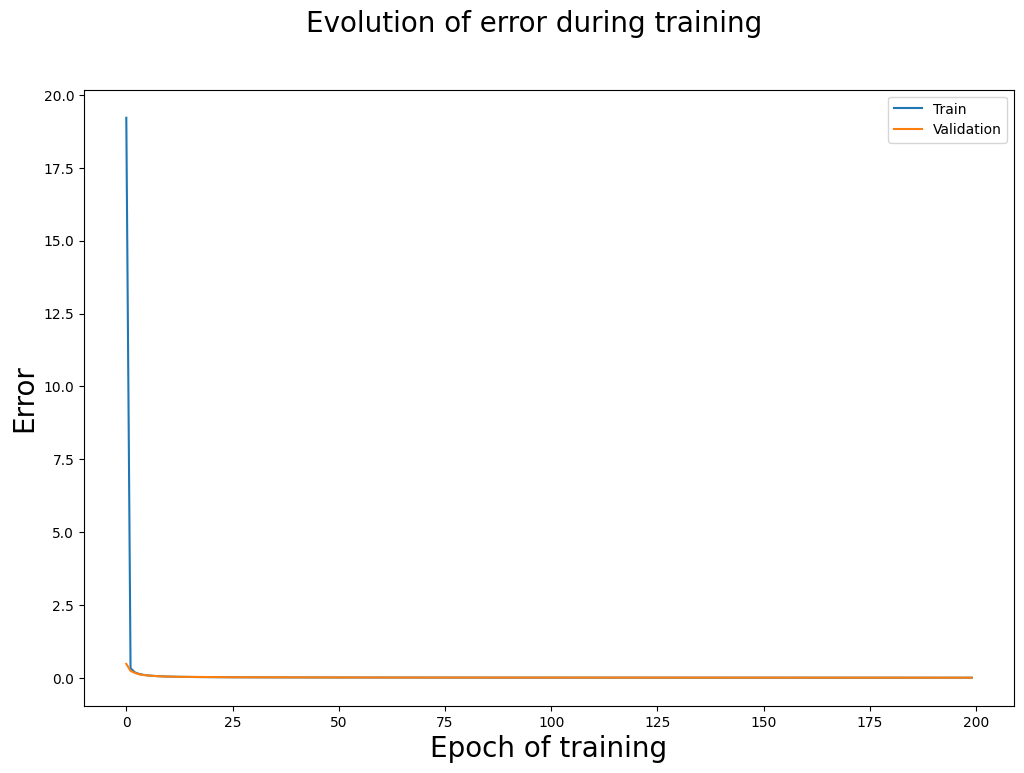

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import Utility
import NeuralNet

# Load data
df = pd.read_csv('iris_extended.csv')

# Encode the soil_type column by -1, 0, 1
df['soil_type'] = df['soil_type'].astype('category').cat.codes - 1

# Extraite features and labels with normalizing
df_columns = df.columns.values.tolist()
features = df_columns[1:]
df[features] = df[features].apply(lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1)
label_col = df_columns[0]
labels = df[label_col].to_numpy()
unique_labels = np.unique(labels)

# We have responses equal to the instances
X = df[features]
y = df[features]

# 1000 instances -- train, 200 instances -- test
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=200, random_state=42)

# Convert dataframes to numpy arrays
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()
X_val, y_val = X_val.to_numpy(), y_val.to_numpy()
X_all, y_all = X.to_numpy(), y.to_numpy()

# Initialize a neural network
nn4 = NeuralNet.NeuralNet(hidden_layer_sizes=(16, 4, 16), activation='tahn', learning_rate=0.01, epoch=200, batch_size=10)
nn8 = NeuralNet.NeuralNet(hidden_layer_sizes=(16, 8, 16), activation='tahn', learning_rate=0.01, epoch=200, batch_size=10)
nn12 = NeuralNet.NeuralNet(hidden_layer_sizes=(16, 12, 16), activation='tahn', learning_rate=0.01, epoch=200, batch_size=10)

# Fit the model
nn4.fit(X_train, y_train, X_val, y_val)
nn8.fit(X_train, y_train, X_val, y_val)
nn12.fit(X_train, y_train, X_val, y_val)

In [29]:
# Functions pour l'erreur moyenne et son ecart-type
def mse_instance(X, y, nn, make_plot = True):

    return np.mean(np.square(np.subtract(nn.predict(X), y)), axis=1)


def mse_attribute(X, y, nn, make_plot = True):

    mse_par_attr = np.square(np.subtract(nn.predict(X), y))
    if make_plot:
        errors = mse_par_attr.T
        errors_names = [f"Atr {i + 1}" for i in range(20)]

        means = np.mean(errors, axis=1)
        stds = np.std(errors, axis=1)

        plt.figure(figsize=(12, 8))
        plt.errorbar(errors_names, means, yerr=stds, fmt='o', capsize=5, color='black')

        plt.title(f"Comparing of errors for different attributes")
        plt.ylabel('Value')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


    return np.mean(mse_par_attr, axis=0)


def mse_classe(X, y, nn, make_plot = True):
    errors = []
    errors_mean = []
    for lab in unique_labels:
        mask = labels == lab
        X_lab, y_lab = X[mask], y[mask]

        mse_par_class = np.mean(np.square(np.subtract(nn.predict(X_lab), y_lab)), axis = 1)
        errors.append(mse_par_class)
        errors_mean.append(np.mean(mse_par_class))

    if make_plot:
        errors_names = [f"Class {i + 1}" for i in range(3)]

        stds = [np.std(m) for m in errors]

        plt.figure(figsize=(12, 8))
        plt.errorbar(errors_names, errors_mean, yerr=stds, fmt='o', capsize=5, color='black')

        plt.title(f"Comparing of errors for different classes")
        plt.ylabel('Value')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return errors_mean

def plot_model_comparison(type):
    if type == 'instance':
        error_f = mse_instance
    elif type == 'attribute':
        error_f = mse_attribute
    elif type == 'classe':
        error_f = mse_classe

    # array of errors for 3 models
    errors = [error_f(X_all, y_all, nn4, make_plot = False), error_f(X_all, y_all, nn8, make_plot = False), error_f(X_all, y_all, nn12, make_plot = False)]
    errors_names = [f"Model compressing to {4 * i} features" for i in range(1, 4)]

    # Mean and ecart-type
    means = [np.mean(m) for m in errors]
    stds = [np.std(m) for m in errors]


    # Drawing plot
    plt.figure(figsize=(12, 8))
    plt.errorbar(errors_names, means, yerr=stds, fmt='o', capsize=5, color='black')

    plt.title(f"Comparing of {type}s errors for 3 different models")
    plt.ylabel('Value')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Item 1: compressing and reconstruction of 1 Item

In [30]:
ind = np.random.choice(len(X_val))
instance = X_val[ind:ind+1]

inst_compressed = nn8.compresse(instance)

inst_reconstructed = nn8.reconstruction(inst_compressed)

print("Instance:\n", instance, end="\n\n")
print("Compressed forme:\n", inst_compressed, end="\n\n")
print("Reconstruction:\n", inst_reconstructed)

Instance:
 [[-0.47718175  0.          0.1023622  -0.14379085  0.47383721  0.21088435
   0.11638436 -0.04965715 -0.16649592 -0.8959118  -0.83343974 -0.97075314
  -0.23993559 -0.37959184  0.16323731 -0.44504228  0.41278733  0.2516743
   0.34131588 -0.988544  ]]

Compressed forme:
 [[ 0.68086822  0.47267687 -2.69067604  4.82848078  1.09158722  2.86578133
  -3.21572359 -2.5434556 ]]

Reconstruction:
 [[-0.33732116  0.10787275  0.08897632 -0.24577861  0.46344631  0.23340697
   0.1177945  -0.07618257 -0.12427696 -0.89428227 -0.93080088 -1.00114978
  -0.22698137 -0.431446    0.19550024 -0.47235588  0.46221638  0.29952538
   0.39134492 -1.0621991 ]]


Item 2: classe le plus compiqué


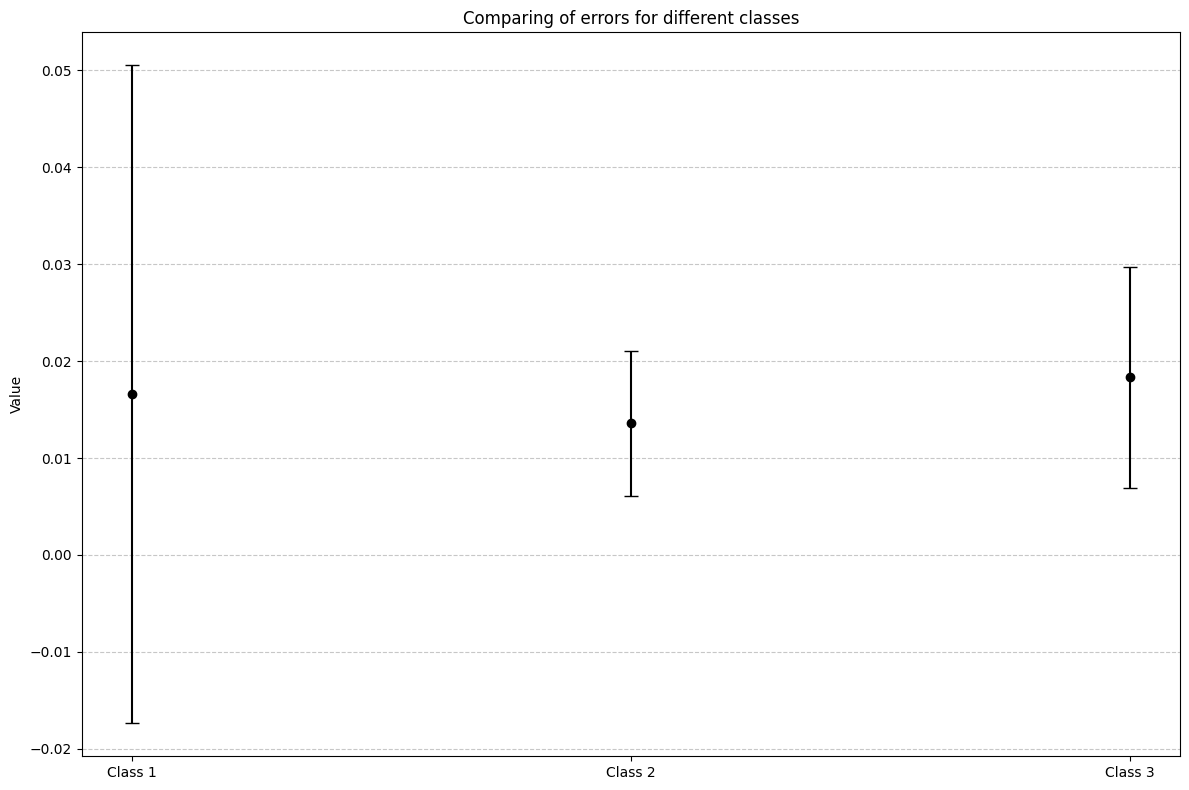

[np.float64(0.01657307928158639),
 np.float64(0.013600088087918133),
 np.float64(0.018307825664142362)]

In [31]:
mse_classe(X, y, nn8)

Item 4: ncodage proches de deux enstances

In [32]:
def MSE_cost(y_hat, y):
    mse = np.square(np.subtract(y_hat, y)).mean()
    return mse

inst_proches = []

found = False
for i in range(len(X_all)):
    if found:
        break
    for j in range(i + 1, len(X_all)):
        if MSE_cost(nn8.compresse(X_all[i]), nn8.compresse(X_all[j])) < 0.03:
                print("Difference between compressed vectors: ", MSE_cost(nn8.compresse(X_all[i]), nn8.compresse(X_all[j])))
                print("Difference between original vectors:   ", MSE_cost(X_all[i], X_all[j]))
                found = True
                break

Difference between compressed vectors:  0.029944735893330618
Difference between original vectors:    0.0034617767176481533


Item 5:

In [33]:
instances=[]
indexes = np.random.choice(len(X_all), size=3)
for ind in indexes:
    instances.append(X_all[ind:ind+1])

for inst in instances:
    print(MSE_cost(inst, nn8.predict(inst)))

print()

for i in range(3):
    inst = instances[i]
    print(f"*INSTANCE {i + 1}*")

    print("Error:", MSE_cost(inst, nn8.predict(inst)))

    print("Two most significants attributes:")
    error = np.square(inst - nn8.predict(inst)).flatten()
    top2_indices = np.argsort(error)[-2:][::-1]
    top2_values = error[top2_indices]

    for idx, val in zip(top2_indices, top2_values):
        print(f"    Atr: {idx}, error: {val}")
    print()

0.01570176000624528
0.023331636375858476
0.016751553501317816

*INSTANCE 1*
Error: 0.01570176000624528
Two most significants attributes:
    Atr: 15, error: 0.08812179763284733
    Atr: 12, error: 0.06412077757936711

*INSTANCE 2*
Error: 0.023331636375858476
Two most significants attributes:
    Atr: 19, error: 0.09246364333544664
    Atr: 0, error: 0.060455327045532234

*INSTANCE 3*
Error: 0.016751553501317816
Two most significants attributes:
    Atr: 8, error: 0.07790127146546297
    Atr: 6, error: 0.04559058398191516



Item 6: vizualition des erreurs


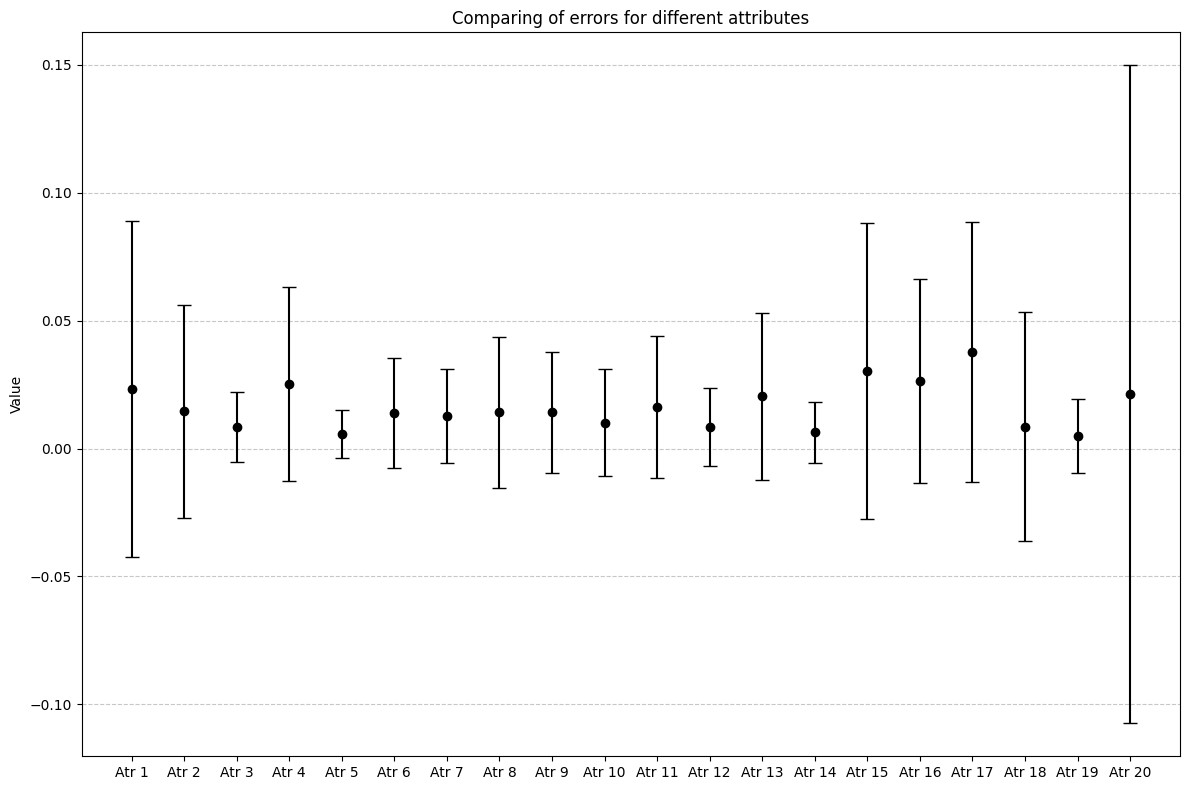

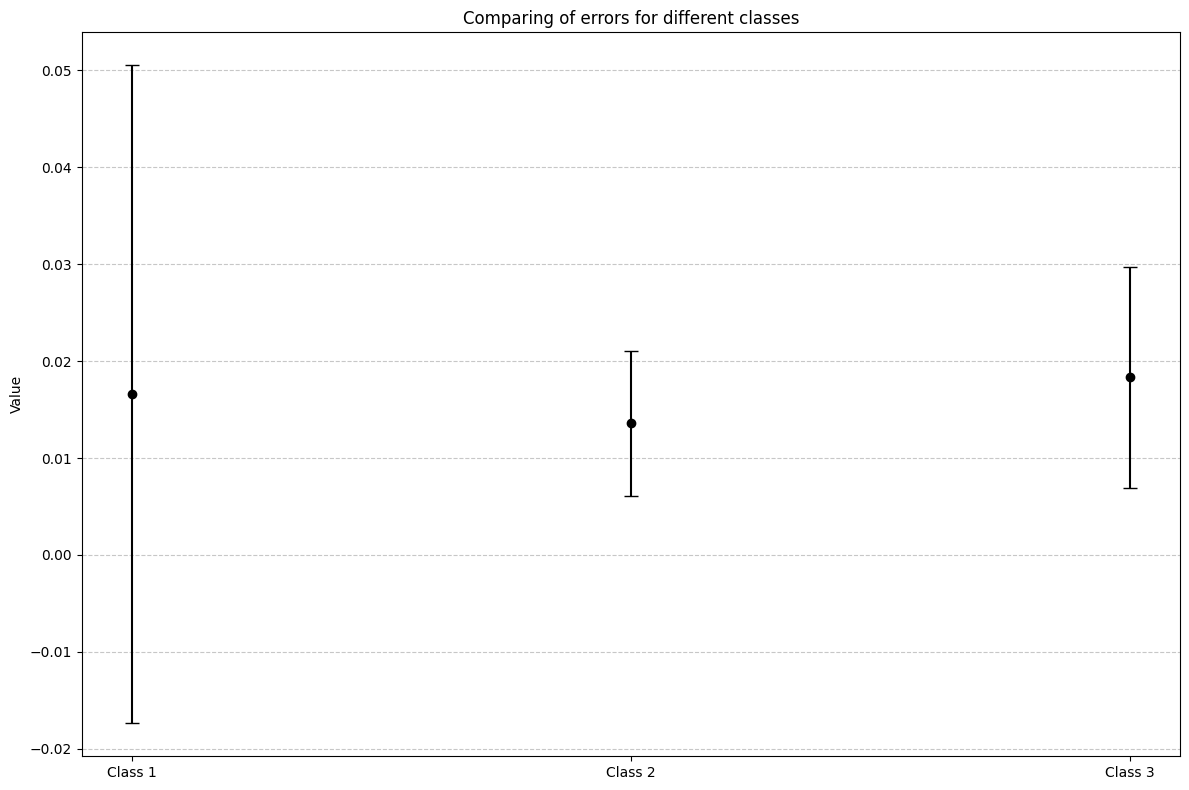

[np.float64(0.01657307928158639),
 np.float64(0.013600088087918133),
 np.float64(0.018307825664142362)]

In [34]:
mse_attribute(X_all, y_all, nn8)

mse_classe(X, y, nn8)

Item 7: visualisation de ACP


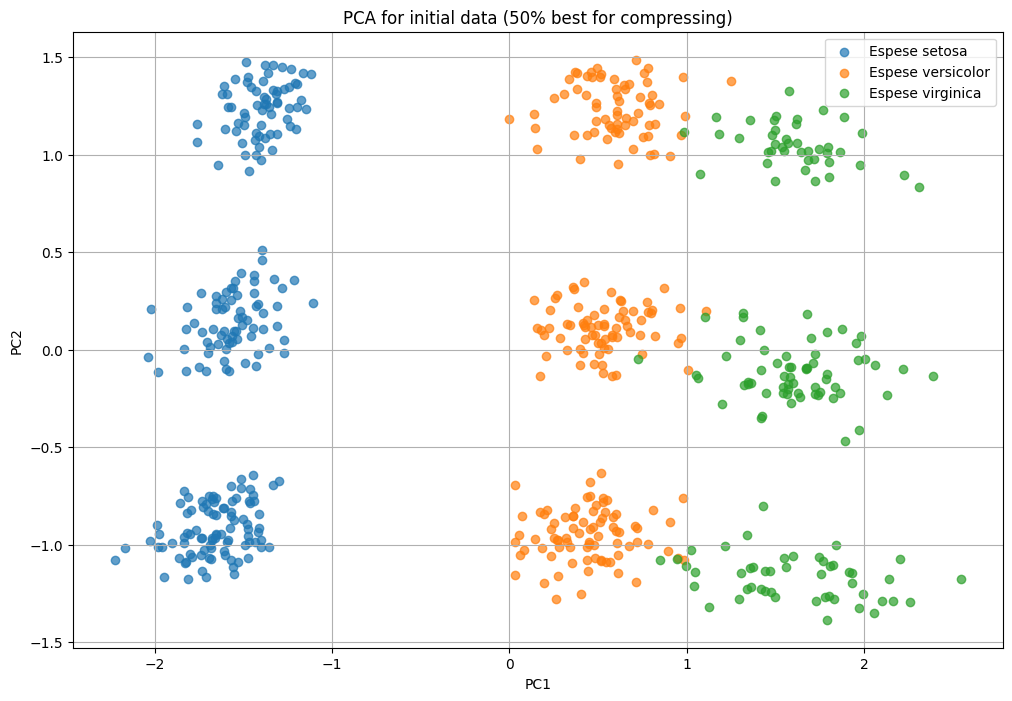

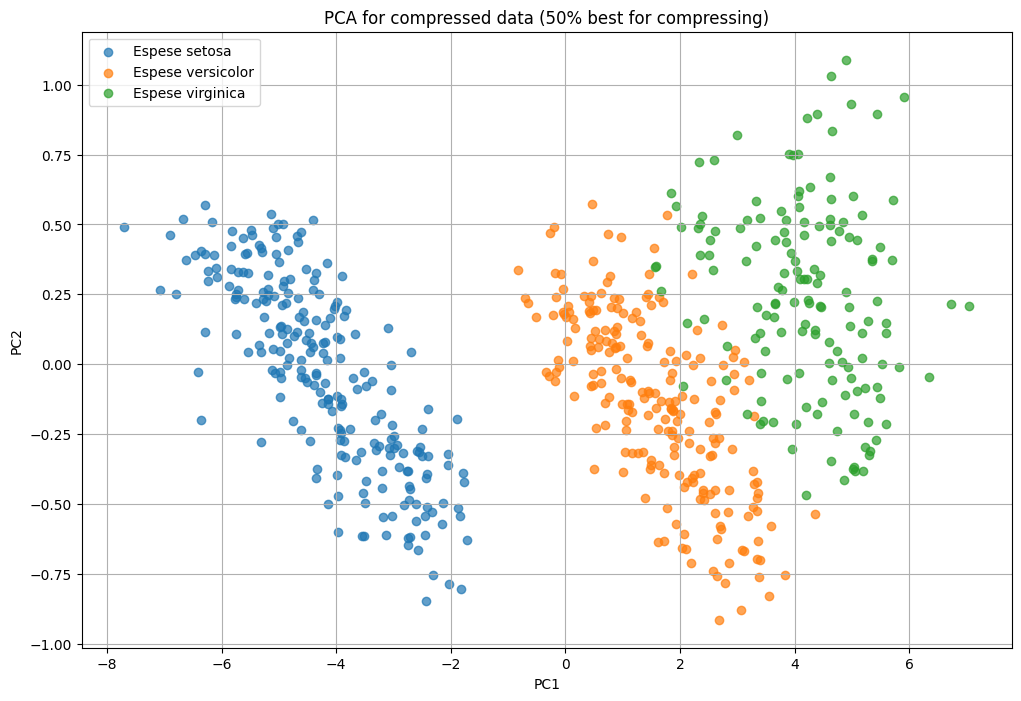

In [40]:
all_errors = np.square(np.subtract(nn4.predict(X_all), y_all)).mean(axis=1) / 2

median = np.median(all_errors)
mask = all_errors < median
X_50 = X_all[mask, :]
labels_50 = labels[mask]

# Make the predictions for best 50%
X_50_compressed_to4 = nn4.compresse(X_50)
X_50_compressed_to8 = nn8.compresse(X_50)
X_50_compressed_to12 = nn12.compresse(X_50)


# PCA graphiques for 8-compressing
pca = PCA(n_components=2)

# PCA graphique for initial data (50% best)
X_50_pca = pca.fit_transform(X_50)
plt.figure(figsize=(12, 8))

for lab in unique_labels:
    mask = labels_50 == lab
    plt.scatter(
        X_50_pca[mask, 0],
        X_50_pca[mask, 1],
        label= f"Espese {lab}",
        alpha=0.7
    )

plt.title('PCA for initial data (50% best for compressing)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# PCA graphique for compressed data (50% best)
X_50_comp_pca = pca.fit_transform(X_50_compressed_to4)

plt.figure(figsize=(12, 8))
for lab in unique_labels:
    mask = labels_50 == lab
    plt.scatter(
        X_50_comp_pca[mask, 0],
        X_50_comp_pca[mask, 1],
        label= f"Espese {lab}",
        alpha=0.7
    )

plt.title('PCA for compressed data (50% best for compressing)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


Item 8: comparaison des models


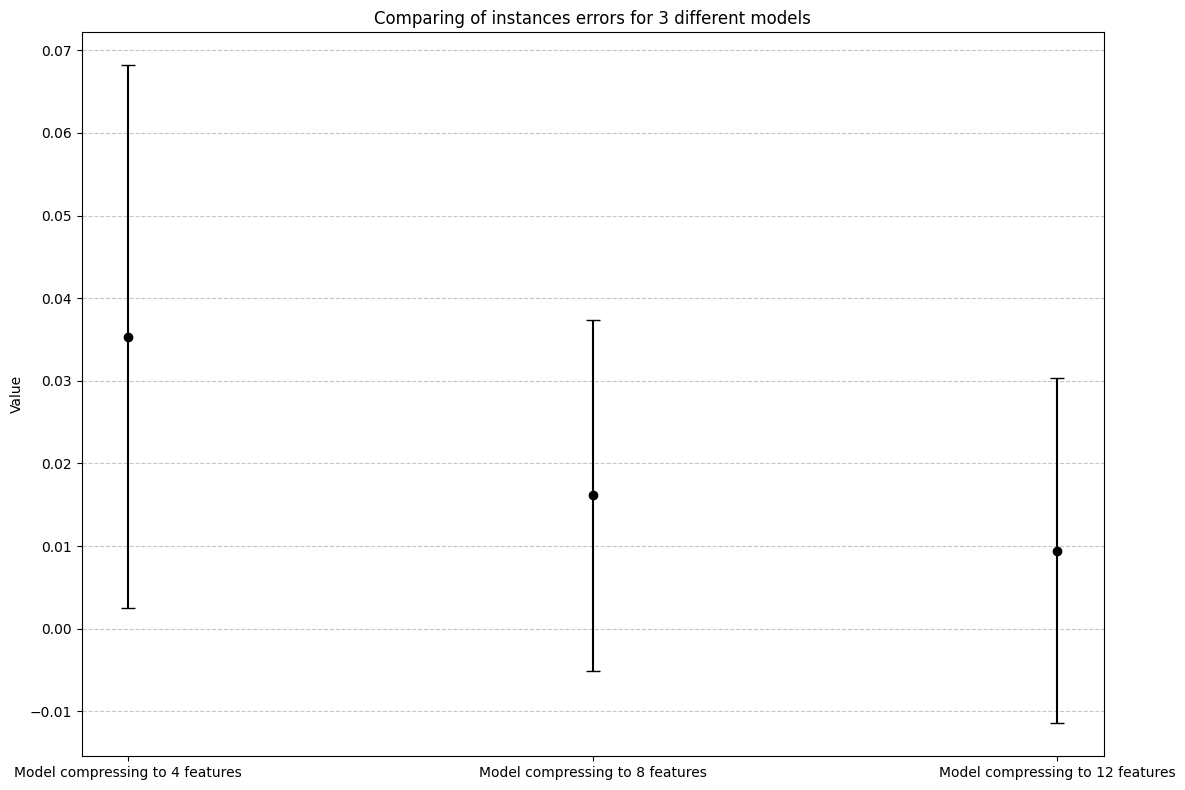

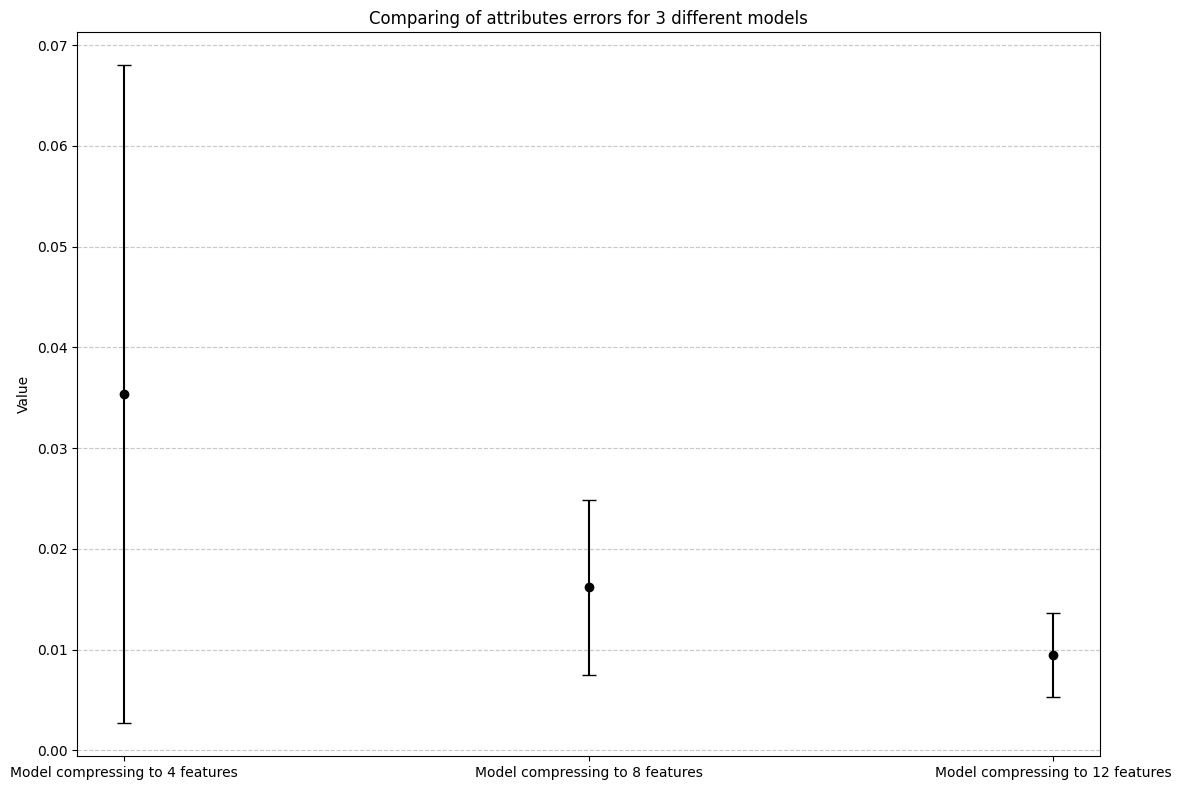

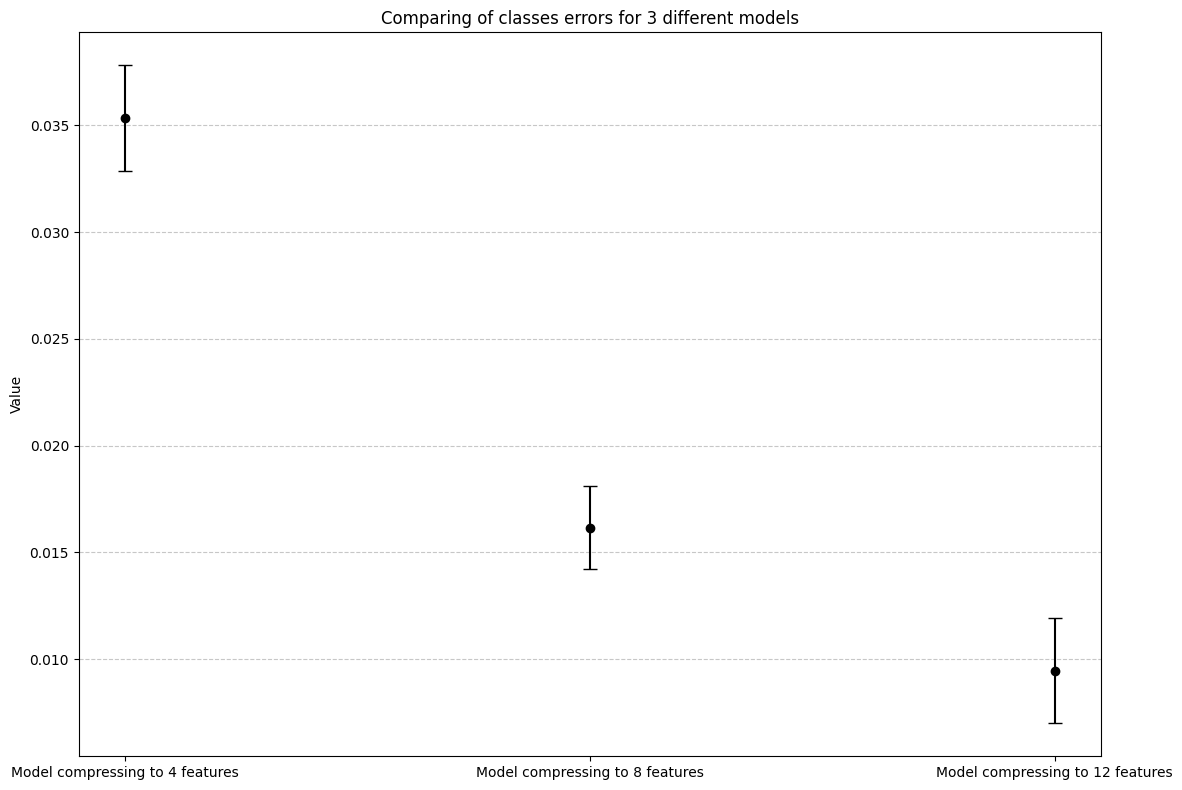

In [37]:
plot_model_comparison('instance')
plot_model_comparison('attribute')
plot_model_comparison('classe')
